# ⚖️ Compensación Varianza - Sesgo

Cada estimador en *machine learning* tiene sus **ventajas y desventajas**.  
El error de generalización puede descomponerse en **sesgo**, **varianza** y **ruido**.  

---

## 📌 Componentes del error

- **Sesgo**  
  - Es el **error promedio** de un modelo en diferentes conjuntos de entrenamiento.  
  - Indica si el modelo está demasiado **simplificado**.  

- **Varianza**  
  - Mide qué tan **sensible** es el modelo a los cambios en los datos de entrenamiento.  
  - Un modelo con alta varianza se **sobreajusta** (*overfitting*).  

- **Ruido**  
  - Es una **propiedad inherente de los datos**.  
  - Representa la parte del error que **no se puede eliminar**.  

---

## 🎯 Estrategia de modelado
- El **sesgo** y la **varianza** son propiedades inherentes de los estimadores.  
- Debemos elegir algoritmos de aprendizaje e **hiperparámetros** que reduzcan tanto el sesgo como la varianza.  

---

## 📊 Reducción de varianza
- Una forma de reducir la **varianza** de un modelo es **usar más datos de entrenamiento**.  
- ⚠️ Sin embargo, solo vale la pena recolectar más datos si la **función verdadera** es demasiado compleja para ser aproximada por un estimador con menor varianza.  

---

👉 En resumen:  
El **trade-off sesgo-varianza** consiste en encontrar el equilibrio entre:  
- Modelos **simples** (alto sesgo, baja varianza).  
- Modelos **complejos** (bajo sesgo, alta varianza).  


Automatically created module for IPython interactive environment


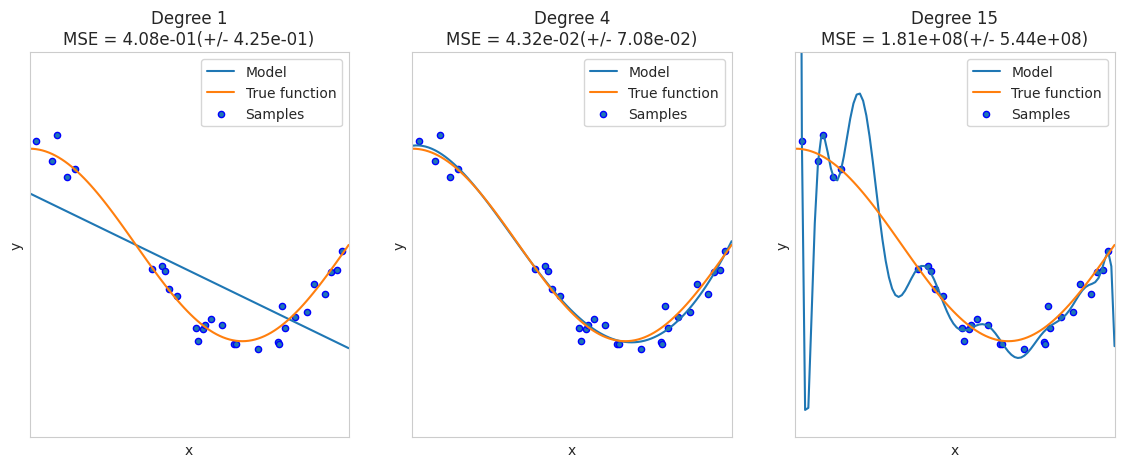

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

print(__doc__)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Definimos la función verdadera que queremos aproximar
# f(x) = cos(1.5 * pi * x)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Fijamos semilla para reproducibilidad\ nnp.random.seed(0)
np.random.seed(0)

# Número de muestras y grados de polinomio a probar\ nn_samples = 30
n_samples = 30
degrees = [1, 4, 15]

# Generamos datos de entrenamiento
# X: valores aleatorios en [0,1], ordenados de menor a mayor
# y: true_fun(X) + ruido gaussiano de desviación 0.1
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Creamos la figura con 3 subplots en una fila
plt.figure(figsize=(14, 5))

# Iteramos sobre cada grado de polinomio\ nfor i, degree in enumerate(degrees):
for i in range(len(degrees)):
    # Seleccionamos el subplot i+1
    ax = plt.subplot(1, len(degrees), i + 1)
    # Eliminamos marcas de ejes para mayor limpieza
    plt.setp(ax, xticks=(), yticks=())

    # Definimos el pipeline: generación de polinomios + regresión lineal
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])         
    # Ajustamos el modelo con los datos (convertimos X a 2D)
    pipeline.fit(X[:, np.newaxis], y)

    # Validación cruzada (10 folds) usando MSE negativo
    # cross_val_score devuelve vectores de scores
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
                             

    # Creamos un rango de valores para el eje x y trazar curvas suaves
    X_test = np.linspace(0, 1, 100)
    # Dibujamos la predicción del modelo
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # Dibujamos la función verdadera
    plt.plot(X_test, true_fun(X_test), label="True function")
    # Dibujamos los puntos de muestra
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# 📈 Regresión Polinómica y el Trade-off Bias-Variance

## 🔹 Polinomio de grado 1
- El modelo es **demasiado simple**.  
- Ocurre **underfitting**: no tiene suficiente complejidad para representar la variación real de los datos.  
- El error por **sesgo** es alto.  

---

## 🔹 Polinomio de grado 4
- Representa un buen equilibrio entre **sesgo y varianza**.  
- El modelo **generaliza bien** a nuevos datos.  
- Es el punto óptimo en este ejemplo.  

---

## 🔹 Polinomio de grado 15
- El modelo es **demasiado complejo**.  
- Ocurre **overfitting**: memoriza el ruido en los datos de entrenamiento.  
- Falla al **generalizar** a nuevos datos, con alta **varianza**.  

---

👉 En resumen:  
- **Grado bajo** → underfitting (alto sesgo).  
- **Grado medio** → buen trade-off (balance entre sesgo y varianza).  
- **Grado alto** → overfitting (alta varianza).  


---
---

# CURVA DE VALIDACION

- Para la identificación de sobreajuste y subajuste Trazado de las puntuaciones de entrenamiento y validación frente a los parámetros del modelo

- Curva de Validación para Regresión Ridge

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('whitegrid')

np.logspace(-5, 2, 10)

array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])

In [3]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
# Carga del dataset Iris (150 muestras, 4 características)
iris = load_iris()
# X: matriz de características, y: vector de etiquetas
X, y = iris.data, iris.target 

indices = np.arange(y.shape[0])
# Mezclamos el orden aleatoriamente
np.random.shuffle(indices)
# Reordenamos X e y según los índices barajados
X, y = X[indices], y[indices]
# Nombre del hiperparámetro de Ridge
param_name = "alpha"
# 10 valores de alpha entre 10^-5 y 10^2 (escala log)
param_range = np.logspace(-5, 2, 10)

# Cálculo de scores con validation_curve
#    train_scores y valid_scores tendrán forma (n_params, n_folds)
train_scores, valid_scores = validation_curve(Ridge(), X=X, y=y, param_name=param_name, param_range=param_range, scoring='r2', cv = 5)
                                            
print(train_scores)
print(valid_scores)

# Cálculo de medias y desviaciones estándar por alpha
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.93402177 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.93402165 0.94366408 0.92648373 0.91933298 0.92922496]
 [0.93401745 0.94366071 0.92648029 0.91932802 0.92922113]
 [0.93389586 0.94355928 0.92637718 0.91918279 0.92910687]
 [0.93205263 0.94177586 0.92463947 0.91694153 0.92720799]
 [0.92228794 0.93044202 0.91410512 0.90536425 0.91641986]
 [0.88639151 0.89388841 0.87544946 0.86410466 0.8775965 ]]
[[0.9055033  0.84185934 0.94569792 0.9623102  0.93366145]
 [0.90550329 0.84185927 0.94569788 0.9623103  0.93366148]
 [0.90550322 0.84185886 0.94569763 0.96231095 0.93366168]
 [0.9055028  0.84185642 0.94569616 0.96231484 0.93366288]
 [0.90550013 0.84184177 0.94568728 0.96233794 0.93366996]
 [0.90547728 0.84175364 0.94563271 0.96246899 0.93370881]
 [0.90515448 0.84121986 0.94526905 0.96303429 0.93383501]
 [0.90130661 

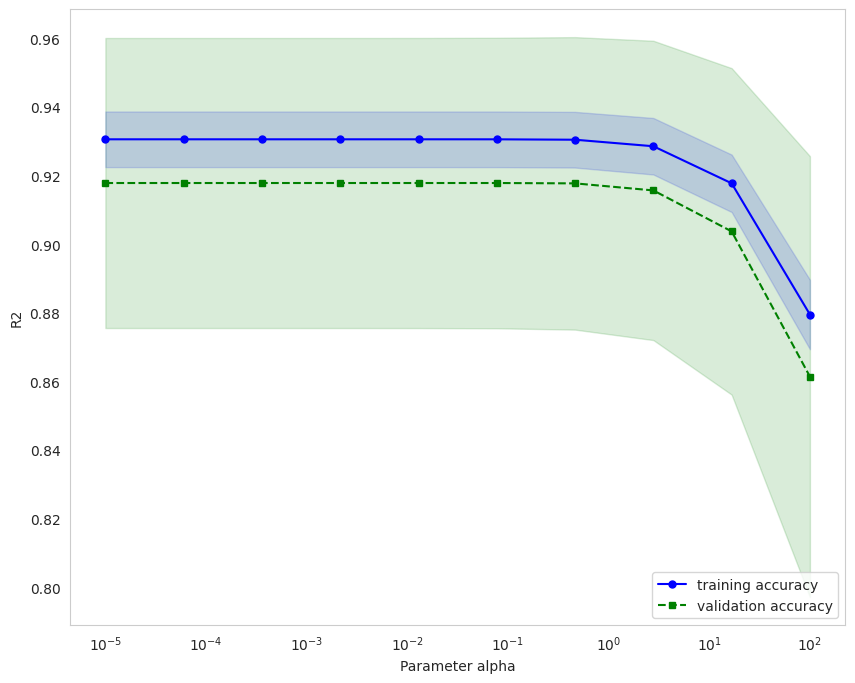

In [4]:
# Graficación de la curva de validación
plt.figure(figsize=(10,8))
# Curva de R2 en entrenamiento
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')  

# Banda de variabilidad
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

# Curva de R2 en validación cruzada
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
         
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')
#plt.ylim([0.8, 1.0])
plt.show()

- La linea azul representa la precision del modelo entrenado y la verde la validacion de la precision, el objetivo es que ambas lineas se encuentren lo mas cercanas posible. En este caso se presenta casi como un modelo de prediccion perfecto, ya que las lineas se encuentran cercanas y tienen una alta tasa de precision.
---
---


# 📉 Trazado de la Curva de Validación

En esta gráfica se muestran las **puntuaciones de entrenamiento y validación** de un **SVM** para diferentes valores del parámetro del kernel `gamma`.  

---

## 📌 Interpretación de la curva

### 🔹 Gamma muy bajo
- Tanto la puntuación de entrenamiento como la de validación son **bajas**.  
- El modelo **no captura la complejidad de los datos**.  
- Ocurre **subajuste (underfitting)**.  

---

### 🔹 Gamma medio
- Puntuaciones **altas en entrenamiento y validación**.  
- El clasificador está funcionando **adecuadamente**.  
- Representa un **buen equilibrio** entre sesgo y varianza.  

---

### 🔹 Gamma muy alto
- La puntuación de entrenamiento es **alta**, pero la de validación es **baja**.  
- El modelo **memoriza el ruido** en los datos.  
- Ocurre **sobreajuste (overfitting)**.  

---

👉 En resumen:  
El **valor de gamma** controla la complejidad de la frontera de decisión del SVM:  
- **Muy bajo** → underfitting.  
- **Adecuado** → buen desempeño.  
- **Muy alto** → overfitting.  


In [5]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Cargamos el dataset de dígitos (8x8 píxeles, 10 clases)
digits = load_digits()
# X: matriz de características, y: etiquetas
X, y = digits.data, digits.target

# Calculamos la curva de validación
# - Con SVC (sin cambiar otros parámetros)
# - cv=10 folds, métrica accuracy, sin paralelizar (n_jobs=1)
param_range = np.logspace(-6, -1, 10)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)
                                             
# Media y desviación estándar de los scores para cada gamma\ ntrain_scores_mean = np.mean(train_scores, axis=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Automatically created module for IPython interactive environment


<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_4940/2963824557.py:3: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$\gamma$")


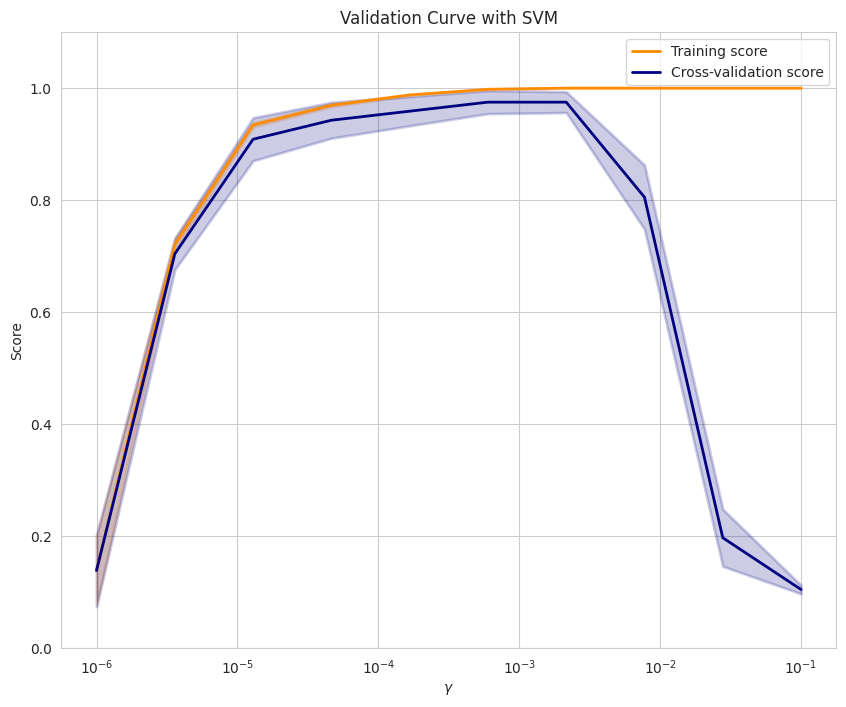

In [6]:
plt.figure(figsize=(10,8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1) # Limites del eje y para ver 0–1
lw = 2 # Grosor de línea

# Curva de training en escala logarítmica
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

# Curva de cross-validation
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

- En este caso se ve como la linea azul (predicciones) se ajusta a la realidad, al principio se ajusta bien pero tiene muy poca precision ya que se ofrece poca flexibilidad al modelo, el punto idoneo se encuentra entre 10^-3 y -2, donde el modelo permite flexibilidad y tiene una alta tasa de precision antes de que esta caiga de manera brusca, en el momento que se le otorga demasiada flexibilidad.
---
---

# 📉 Curva de Aprendizaje

La **curva de aprendizaje** muestra las **puntuaciones de validación y entrenamiento** de un estimador para distintos tamaños del conjunto de entrenamiento.  

Es una herramienta útil para:  
- Evaluar cuánto se beneficia el modelo al agregar más datos de entrenamiento.  
- Diagnosticar si el modelo sufre más de **error por sesgo** o **error por varianza**.  

---

## 📌 Casos típicos

### 🔹 1. Buena compensación entre sesgo y varianza
- El nivel de rendimiento (precisión/puntuación) está **cerca del nivel deseado**.  
- Las curvas de **entrenamiento y validación convergen** a un valor similar.  

**Imagen esperada:**  
- Una línea horizontal representando el nivel deseado de performance.  
- Curva de entrenamiento: comienza con precisión muy alta y disminuye hasta converger cerca del nivel deseado.  
- Curva de validación: comienza con baja precisión y aumenta con más muestras, acercándose también al nivel deseado.  

---

### 🔹 2. Alta presencia de sesgo (underfitting)
- Baja precisión tanto en entrenamiento como en validación.  
- El modelo no logra aprender la complejidad de los datos.  
- El nivel de rendimiento real está **muy por debajo del nivel deseado**.  

**Soluciones:**  
- Aumentar el número de parámetros (más características o modelos más complejos).  
- Disminuir la regularización → dar más flexibilidad al modelo.  

**Imagen esperada:**  
- Línea horizontal del nivel deseado.  
- Curva de entrenamiento: comienza cerca del nivel deseado, pero se aleja hacia abajo con más datos.  
- Curva de validación: empieza baja y sube un poco, pero ambas curvas (train y test) se mantienen lejos del nivel deseado.  

---

### 🔹 3. Alta presencia de varianza (overfitting)
- Las curvas de entrenamiento y validación **no convergen** o lo hacen muy lentamente.  
- Alta diferencia entre precisión de entrenamiento y validación.  
- El modelo aprende demasiado los datos de entrenamiento (memoriza).  

**Soluciones:**  
- Recolectar más datos de entrenamiento.  
- Reducir la complejidad del modelo.  
- Aumentar la regularización → limitar la flexibilidad del modelo.  

**Imagen esperada:**  
- Línea horizontal del nivel deseado.  
- Curva de entrenamiento: empieza con precisión muy alta, baja un poco pero sigue lejos del nivel deseado.  
- Curva de validación: comienza baja, sube con más muestras, pero ambas curvas se quedan lejos del nivel deseado y separadas entre sí.  

---

## 📊 En resumen
- **Sesgo**: evaluado por el **nivel de precisión alcanzado** (si está muy por debajo del deseado → underfitting).  
- **Varianza**: evaluada por la **distancia entre las curvas de entrenamiento y validación** y la **velocidad de convergencia**.  
